# Recipes classification model

In [125]:
import re
from typing import Any, Dict, List

import cloudpickle
import eli5
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import snowballstemmer
from nltk.tokenize import RegexpTokenizer
from scipy.stats import randint
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud

In [ ]:
class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self._stopwords = [
            "abi",
            "abidvi",
            "abiejose",
            "abiejuose",
            "abiejø",
            "abiem",
            "abigaliai",
            "abipus",
            "abu",
            "abudu",
            "ai",
            "ana",
            "anaiptol",
            "anaisiais",
            "anajai",
            "anajam",
            "anajame",
            "anapus",
            "anas",
            "anasai",
            "anasis",
            "anei",
            "aniedvi",
            "anieji",
            "aniesiems",
            "anoji",
            "anojo",
            "anojoje",
            "anokia",
            "anoks",
            "anosiomis",
            "anosioms",
            "anosios",
            "anosiose",
            "anot",
            "ant",
            "antai",
            "anuodu",
            "anuoju",
            "anuosiuose",
            "anuosius",
            "anàja",
            "anàjà",
            "anàjá",
            "anàsias",
            "anøjø",
            "apie",
            "aplink",
            "ar",
            "arba",
            "argi",
            "arti",
            "aukðèiau",
            "að",
            "be",
            "bei",
            "beje",
            "bemaþ",
            "bent",
            "bet",
            "betgi",
            "beveik",
            "dar",
            "dargi",
            "daugmaþ",
            "deja",
            "dëka",
            "dël",
            "dëlei",
            "dëlto",
            "ech",
            "et",
            "gal",
            "galbût",
            "galgi",
            "gan",
            "gana",
            "gi",
            "greta",
            "idant",
            "iki",
            "ir",
            "irgi",
            "it",
            "itin",
            "ið",
            "iðilgai",
            "iðvis",
            "jaisiais",
            "jajai",
            "jajam",
            "jajame",
            "jei",
            "jeigu",
            "ji",
            "jiedu",
            "jiedvi",
            "jieji",
            "jiesiems",
            "jinai",
            "jis",
            "jisai",
            "jog",
            "joji",
            "jojo",
            "jojoje",
            "jokia",
            "joks",
            "josiomis",
            "josioms",
            "josios",
            "josiose",
            "judu",
            "judvi",
            "juk",
            "jumis",
            "jums",
            "jumyse",
            "juodu",
            "juoju",
            "juosiuose",
            "juosius",
            "jus",
            "jàja",
            "jàjà",
            "jàsias",
            "jájá",
            "jøjø",
            "jûs",
            "jûsiðkis",
            "jûsiðkë",
            "jûsø",
            "kad",
            "kada",
            "kadangi",
            "kai",
            "kaip",
            "kaipgi",
            "kas",
            "katra",
            "katras",
            "katriedvi",
            "katruodu",
            "kaþin",
            "kaþkas",
            "kaþkatra",
            "kaþkatras",
            "kaþkokia",
            "kaþkoks",
            "kaþkuri",
            "kaþkuris",
            "kiaurai",
            "kiek",
            "kiekvienas",
            "kieno",
            "kita",
            "kitas",
            "kitokia",
            "kitoks",
            "kodël",
            "kokia",
            "koks",
            "kol",
            "kolei",
            "kone",
            "kuomet",
            "kur",
            "kurgi",
            "kuri",
            "kuriedvi",
            "kuris",
            "kuriuodu",
            "lai",
            "lig",
            "ligi",
            "link",
            "lyg",
            "man",
            "manaisiais",
            "manajai",
            "manajam",
            "manajame",
            "manas",
            "manasai",
            "manasis",
            "mane",
            "manieji",
            "maniesiems",
            "manim",
            "manimi",
            "maniðkis",
            "maniðkë",
            "mano",
            "manoji",
            "manojo",
            "manojoje",
            "manosiomis",
            "manosioms",
            "manosios",
            "manosiose",
            "manuoju",
            "manuosiuose",
            "manuosius",
            "manyje",
            "manàja",
            "manàjà",
            "manàjá",
            "manàsias",
            "manæs",
            "manøjø",
            "mat",
            "maþdaug",
            "maþne",
            "mes",
            "mudu",
            "mudvi",
            "mumis",
            "mums",
            "mumyse",
            "mus",
            "mûsiðkis",
            "mûsiðkë",
            "mûsø",
            "na",
            "nagi",
            "ne",
            "nebe",
            "nebent",
            "negi",
            "negu",
            "nei",
            "nejau",
            "nejaugi",
            "nekaip",
            "nelyginant",
            "nes",
            "net",
            "netgi",
            "netoli",
            "neva",
            "nors",
            "nuo",
            "në",
            "o",
            "ogi",
            "oi",
            "paeiliui",
            "pagal",
            "pakeliui",
            "palaipsniui",
            "palei",
            "pas",
            "pasak",
            "paskos",
            "paskui",
            "paskum",
            "pat",
            "pati",
            "patiems",
            "paties",
            "pats",
            "patys",
            "patá",
            "paèiais",
            "paèiam",
            "paèiame",
            "paèiu",
            "paèiuose",
            "paèius",
            "paèiø",
            "per",
            "pernelyg",
            "pirm",
            "pirma",
            "pirmiau",
            "po",
            "prie",
            "prieð",
            "prieðais",
            "pro",
            "pusiau",
            "rasi",
            "rodos",
            "sau",
            "savaisiais",
            "savajai",
            "savajam",
            "savajame",
            "savas",
            "savasai",
            "savasis",
            "save",
            "savieji",
            "saviesiems",
            "savimi",
            "saviðkis",
            "saviðkë",
            "savo",
            "savoji",
            "savojo",
            "savojoje",
            "savosiomis",
            "savosioms",
            "savosios",
            "savosiose",
            "savuoju",
            "savuosiuose",
            "savuosius",
            "savyje",
            "savàja",
            "savàjà",
            "savàjá",
            "savàsias",
            "savæs",
            "savøjø",
            "skersai",
            "skradþiai",
            "staèiai",
            "su",
            "sulig",
            "ta",
            "tad",
            "tai",
            "taigi",
            "taip",
            "taipogi",
            "taisiais",
            "tajai",
            "tajam",
            "tajame",
            "tamsta",
            "tarp",
            "tarsi",
            "tartum",
            "tarytum",
            "tas",
            "tasai",
            "tau",
            "tavaisiais",
            "tavajai",
            "tavajam",
            "tavajame",
            "tavas",
            "tavasai",
            "tavasis",
            "tave",
            "tavieji",
            "taviesiems",
            "tavimi",
            "taviðkis",
            "taviðkë",
            "tavo",
            "tavoji",
            "tavojo",
            "tavojoje",
            "tavosiomis",
            "tavosioms",
            "tavosios",
            "tavosiose",
            "tavuoju",
            "tavuosiuose",
            "tavuosius",
            "tavyje",
            "tavàja",
            "tavàjà",
            "tavàjá",
            "tavàsias",
            "tavæs",
            "tavøjø",
            "taèiau",
            "te",
            "tegu",
            "tegul",
            "tiedvi",
            "tieji",
            "ties",
            "tiesiems",
            "tiesiog",
            "tik",
            "tikriausiai",
            "tiktai",
            "toji",
            "tojo",
            "tojoje",
            "tokia",
            "toks",
            "tol",
            "tolei",
            "toliau",
            "tosiomis",
            "tosioms",
            "tosios",
            "tosiose",
            "tu",
            "tuodu",
            "tuoju",
            "tuosiuose",
            "tuosius",
            "turbût",
            "tàja",
            "tàjà",
            "tàjá",
            "tàsias",
            "tøjø",
            "tûlas",
            "uþ",
            "uþtat",
            "uþvis",
            "va",
            "vai",
            "viduj",
            "vidury",
            "vien",
            "vienas",
            "vienokia",
            "vienoks",
            "vietoj",
            "virð",
            "virðuj",
            "virðum",
            "vis",
            "vis dëlto",
            "visa",
            "visas",
            "visgi",
            "visokia",
            "visoks",
            "vos",
            "vël",
            "vëlgi",
            "ypaè",
        ]

        self._tokenizer = RegexpTokenizer(r"\w+")
        self._stemmer = snowballstemmer.LithuanianStemmer()

    def fit(self, X, y=None):
        return self

    def _clean_html(self, text: str) -> str:
        return re.sub(r"<.*?>", "", text).strip()

    def _transform_text(self, text: str) -> str:
        text = self._clean_html(text)
        words = self._tokenizer.tokenize(text.lower())
        return " ".join(
            [self._stemmer.stemWord(word) for word in words if word not in self._stopwords]
        )

    def transform(self, X: List[str], y=None) -> List[str]:
        return [self._transform_text(x) for x in X]

In [37]:
# Loading data

df = pd.read_parquet("./data/recipes1.parquet")

## EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   455 non-null    object
 1   label   455 non-null    object
dtypes: object(2)
memory usage: 10.7+ KB


<AxesSubplot: xlabel='label', ylabel='count'>

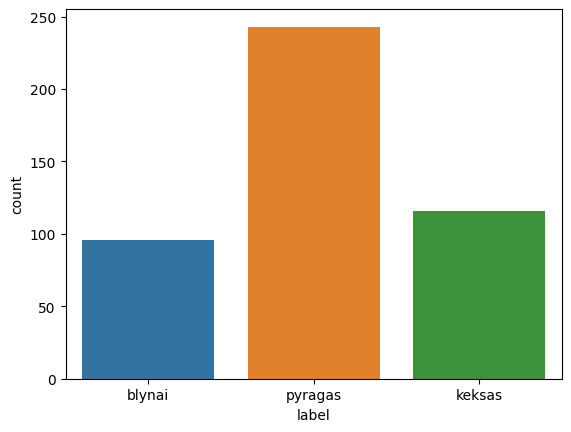

In [39]:
sns.countplot(data=df, x="label")

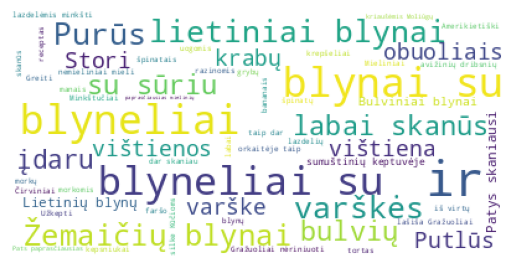

In [40]:
# looking at one of the labels

postivie_df = df.loc[df["label"] == "blynai"]

all_reviews = " ".join(postivie_df["title"].values)

wordcloud = WordCloud().generate(all_reviews)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(
    background_color="white", max_words=60, max_font_size=40, relative_scaling=0.5
).generate(all_reviews)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

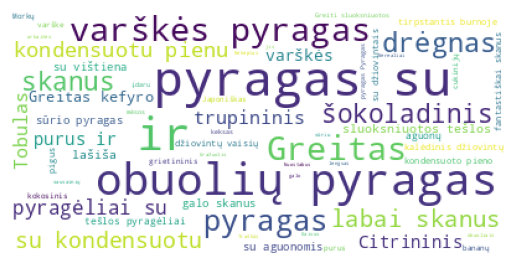

In [41]:
# looking at one of the labels

postivie_df = df.loc[df["label"] == "pyragas"]

all_reviews = " ".join(postivie_df["title"].values)

wordcloud = WordCloud().generate(all_reviews)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(
    background_color="white", max_words=60, max_font_size=40, relative_scaling=0.5
).generate(all_reviews)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

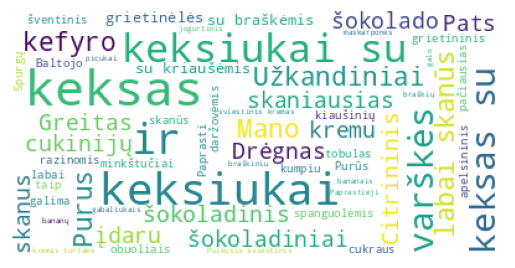

In [42]:
# looking at one of the labels

postivie_df = df.loc[df["label"] == "keksas"]

all_reviews = " ".join(postivie_df["title"].values)

wordcloud = WordCloud().generate(all_reviews)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(
    background_color="white", max_words=60, max_font_size=40, relative_scaling=0.5
).generate(all_reviews)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can see from the wordclouds above, it is really easy to distinguish different categories of meals based on the most popular keyword. As it is not beneficial to have such ML model that would only classify meals based on one word, we must remove it to make more "intelligent" system.

In [72]:
train_df, test_df = train_test_split(df, random_state=42)

In [73]:
pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        ("model", LogisticRegression()),
    ]
)

In [74]:
pipeline.fit(train_df["title"], train_df["label"])

Pipeline(steps=[('text_preprocessor', TextTransformer()),
                ('cv', CountVectorizer()), ('model', LogisticRegression())])

In [75]:
y_true = test_df["label"].values

predictions = pipeline.predict(test_df["title"].values)

print("Accuracy: ", accuracy_score(y_true, predictions))
print("f1_score: ", f1_score(y_true, predictions, average="weighted"))
print(classification_report(y_true, predictions))

Accuracy:  0.9736842105263158
f1_score:  0.9737981316928686
              precision    recall  f1-score   support

      blynai       1.00      1.00      1.00        34
      keksas       0.93      0.96      0.95        27
     pyragas       0.98      0.96      0.97        53

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.97      0.97      0.97       114



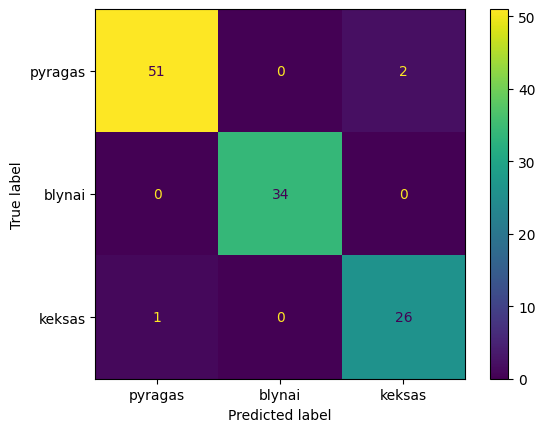

In [76]:
cm = confusion_matrix(test_df["label"], predictions, labels=test_df["label"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_df["label"].unique())
disp.plot()

In [77]:
feature_names = pipeline.named_steps["cv"].get_feature_names_out()
eli5.explain_weights(pipeline.named_steps["model"], top=50, feature_names=feature_names)

Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='blynai', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='blynel', weight=1.7497375076888846, std=None, value=None), FeatureWeight(feature='blyn', weight=1.696770198832379, std=None, value=None), FeatureWeight(feature='lietin', weight=0.40940391781904745, std=None, value=None), FeatureWeight(feature='žemait', weight=0.2951492561478816, std=None, value=None), FeatureWeight(feature='bulv', weight=0.2882673045313634, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.27875230886189817, std=None, value=None), FeatureWeight(feature='mielin', weight=0.23514154195493026, std=None, value=None), FeatureWeight(feature='špinat', weight=0.20895959508500977, std=None, value=None), FeatureWeight(feature='sūr', weight=0.20244423490531088, std=None, value=None), FeatureWeight(feature='amerikietiš', weight=0.19868730592753592, std=None, value=None), FeatureWeight(feature='bulvin', weight=0.18918799120390772, std=None, value=None), FeatureWeight(feature='stor', weight=0.1890532547653053, std=None, value=None), FeatureWeight(feature='sumuštin', weight=0.18439897320975732, std=None, value=None), FeatureWeight(feature='putl', weight=0.1820208424367464, std=None, value=None), FeatureWeight(feature='keptuv', weight=0.16994903389237537, std=None, value=None), FeatureWeight(feature='kepsn', weight=0.16572390148457164, std=None, value=None), FeatureWeight(feature='vištien', weight=0.1617860007149655, std=None, value=None), FeatureWeight(feature='farš', weight=0.15818390213254357, std=None, value=None), FeatureWeight(feature='lab', weight=0.15644451321609723, std=None, value=None), FeatureWeight(feature='mork', weight=0.14987782337211702, std=None, value=None), FeatureWeight(feature='moliūg', weight=0.1484456374749813, std=None, value=None), FeatureWeight(feature='kopūst', weight=0.14315068188514063, std=None, value=None), FeatureWeight(feature='lazdel', weight=0.13817858197339955, std=None, value=None), FeatureWeight(feature='krab', weight=0.13817858197339955, std=None, value=None), FeatureWeight(feature='čirvin', weight=0.13149259268882466, std=None, value=None), FeatureWeight(feature='kūt', weight=0.12369840910513645, std=None, value=None), FeatureWeight(feature='silk', weight=0.12369840910513645, std=None, value=None), FeatureWeight(feature='šventin', weight=0.11279841321206546, std=None, value=None), FeatureWeight(feature='man', weight=0.10710484677261176, std=None, value=None), FeatureWeight(feature='miel', weight=0.10690492014508962, std=None, value=None), FeatureWeight(feature='nemielin', weight=0.10690492014508962, std=None, value=None)], neg=[FeatureWeight(feature='pyrag', weight=-1.71178642150693, std=None, value=None), FeatureWeight(feature='keks', weight=-1.5777309222567566, std=None, value=None), FeatureWeight(feature='greit', weight=-0.2895534794043869, std=None, value=None), FeatureWeight(feature='citrinin', weight=-0.24969498679722255, std=None, value=None), FeatureWeight(feature='šokoladin', weight=-0.23493097646478045, std=None, value=None), FeatureWeight(feature='drėgn', weight=-0.18442526287636413, std=None, value=None), FeatureWeight(feature='obuol', weight=-0.177203312688101, std=None, value=None), FeatureWeight(feature='virš', weight=-0.16604652048627924, std=None, value=None), FeatureWeight(feature='pien', weight=-0.16405349387326468, std=None, value=None), Featu

Let's see how wordclouds look if we remove label as a keyword from the text

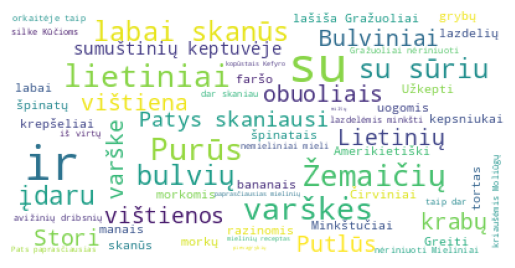

In [78]:
# looking at one of the labels

postivie_df = df.loc[df["label"] == "blynai"]

stem = "blyn"

all_reviews = " ".join(postivie_df["title"].values)

all_reviews = " ".join([i for i in all_reviews.split() if stem not in i.lower()])

wordcloud = WordCloud().generate(all_reviews)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(
    background_color="white", max_words=60, max_font_size=40, relative_scaling=0.5
).generate(all_reviews)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

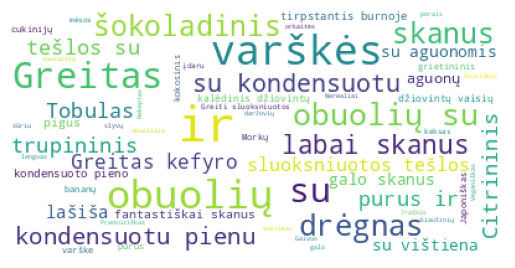

In [79]:
# looking at one of the labels

postivie_df = df.loc[df["label"] == "pyragas"]

stem = "pyr"

all_reviews = " ".join(postivie_df["title"].values)

all_reviews = " ".join([i for i in all_reviews.split() if stem not in i.lower()])

wordcloud = WordCloud().generate(all_reviews)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(
    background_color="white", max_words=60, max_font_size=40, relative_scaling=0.5
).generate(all_reviews)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

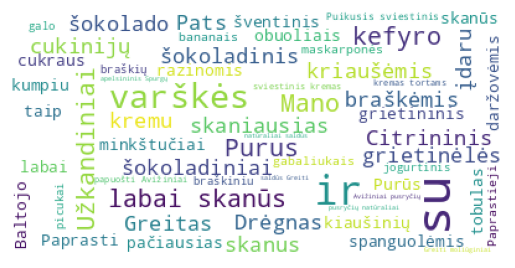

In [80]:
# looking at one of the labels

postivie_df = df.loc[df["label"] == "keksas"]

stem = "keks"

all_reviews = " ".join(postivie_df["title"].values)

all_reviews = " ".join([i for i in all_reviews.split() if stem not in i.lower()])

wordcloud = WordCloud().generate(all_reviews)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(
    background_color="white", max_words=60, max_font_size=40, relative_scaling=0.5
).generate(all_reviews)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

When removing the words that have label's stem in it, we can see more diverse wordclouds. This results in dataset that is more colorful in the amount of different words.

Our goal is to create system that can classify recipes based on their titles even if the class is not provided in the text.

In [81]:
# processing data

train_df["title"] = train_df["title"].apply(
    lambda x: " ".join(i for i in x.split() if "blyn" not in i.lower())
)
train_df["title"] = train_df["title"].apply(
    lambda x: " ".join(i for i in x.split() if "kek" not in i.lower())
)
train_df["title"] = train_df["title"].apply(
    lambda x: " ".join(i for i in x.split() if "pyr" not in i.lower())
)

In [82]:
pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        ("model", LogisticRegression()),
    ]
)

In [83]:
pipeline.fit(train_df["title"], train_df["label"])

Pipeline(steps=[('text_preprocessor', TextTransformer()),
                ('cv', CountVectorizer()), ('model', LogisticRegression())])

In [85]:
y_true = test_df["label"].values

predictions = pipeline.predict(test_df["title"].values)

print("Accuracy: ", accuracy_score(y_true, predictions))
print("f1_score: ", f1_score(y_true, predictions, average="weighted"))
print(classification_report(y_true, predictions))

Accuracy:  0.8596491228070176
f1_score:  0.8622685038293023
              precision    recall  f1-score   support

      blynai       1.00      0.94      0.97        34
      keksas       0.71      0.81      0.76        27
     pyragas       0.86      0.83      0.85        53

    accuracy                           0.86       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.87      0.86      0.86       114



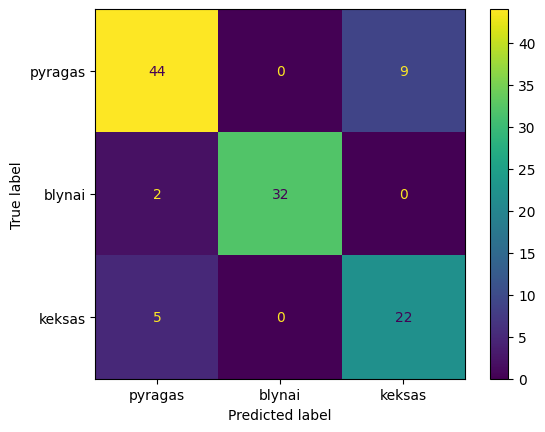

In [86]:
cm = confusion_matrix(test_df["label"], predictions, labels=test_df["label"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_df["label"].unique())
disp.plot()

In [87]:
feature_names = pipeline.named_steps["cv"].get_feature_names_out()

In [88]:
eli5.explain_weights(pipeline.named_steps["model"], top=50, feature_names=feature_names)

Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='blynai', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='lietin', weight=1.5930327431061426, std=None, value=None), FeatureWeight(feature='žemait', weight=1.2616642424984272, std=None, value=None), FeatureWeight(feature='amerikietiš', weight=1.1420596778265975, std=None, value=None), FeatureWeight(feature='mielin', weight=1.12205236924637, std=None, value=None), FeatureWeight(feature='bulv', weight=1.0473143498821977, std=None, value=None), FeatureWeight(feature='kepsn', weight=0.9226577230114383, std=None, value=None), FeatureWeight(feature='kopūst', weight=0.921798663095959, std=None, value=None), FeatureWeight(feature='stor', weight=0.9168486392390388, std=None, value=None), FeatureWeight(feature='sumuštin', weight=0.8663889602861649, std=None, value=None), FeatureWeight(feature='šventin', weight=0.8619777611829237, std=None, value=None), FeatureWeight(feature='bulvin', weight=0.8257059687812597, std=None, value=None), FeatureWeight(feature='farš', weight=0.8223610594494115, std=None, value=None), FeatureWeight(feature='keptuv', weight=0.7668928746382841, std=None, value=None), FeatureWeight(feature='putl', weight=0.7336892886813425, std=None, value=None), FeatureWeight(feature='moliūg', weight=0.6992383992693973, std=None, value=None), FeatureWeight(feature='mork', weight=0.6942658156769855, std=None, value=None), FeatureWeight(feature='špinat', weight=0.684325675999916, std=None, value=None), FeatureWeight(feature='kūt', weight=0.6513825110543513, std=None, value=None), FeatureWeight(feature='silk', weight=0.6513825110543513, std=None, value=None), FeatureWeight(feature='man', weight=0.6454674949244621, std=None, value=None), FeatureWeight(feature='sūr', weight=0.6343226568859683, std=None, value=None), FeatureWeight(feature='milt', weight=0.5859593482850175, std=None, value=None), FeatureWeight(feature='lab', weight=0.54755652271535, std=None, value=None), FeatureWeight(feature='lazdel', weight=0.5265456108700047, std=None, value=None), FeatureWeight(feature='krab', weight=0.5265456108700047, std=None, value=None), FeatureWeight(feature='nėrin', weight=0.4977587139989772, std=None, value=None), FeatureWeight(feature='vištien', weight=0.4939022622164517, std=None, value=None), FeatureWeight(feature='čirvin', weight=0.4680219313085681, std=None, value=None), FeatureWeight(feature='orkait', weight=0.4678578414057427, std=None, value=None), FeatureWeight(feature='skani', weight=0.42661812526441656, std=None, value=None)], neg=[FeatureWeight(feature='drėgn', weight=-1.026030007226289, std=None, value=None), FeatureWeight(feature='greit', weight=-0.7953157085127172, std=None, value=None), FeatureWeight(feature='šokoladin', weight=-0.7806532751980457, std=None, value=None), FeatureWeight(feature='grietinin', weight=-0.7711945896351008, std=None, value=None), FeatureWeight(feature='spanguol', weight=-0.5851699048768598, std=None, value=None), FeatureWeight(feature='citrinin', weight=-0.5617250960376555, std=None, value=None), FeatureWeight(feature='banan', weight=-0.5398166941361555, std=None, value=None), FeatureWeight(feature='pien', weight=-0.5384069400587875, std=None, value=None), FeatureWeight(feature='krem', weight=-0.5366003948431117, std=None, value=None), FeatureWeight(feature='trašk', weight=-0.5289798558474403, std=None, value=None), FeatureWeight(feature='filade

Looking for the best performing model

In [105]:
# Decision tree performance

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        ("model", DecisionTreeClassifier()),
    ]
)

pipeline.fit(train_df["title"], train_df["label"])

y_true = test_df["label"].values

predictions = pipeline.predict(test_df["title"].values)

print("Accuracy: ", accuracy_score(y_true, predictions))
print("f1_score: ", f1_score(y_true, predictions, average="weighted"))
print(classification_report(y_true, predictions))

Accuracy:  0.9385964912280702
f1_score:  0.9399488122525224
              precision    recall  f1-score   support

      blynai       1.00      1.00      1.00        34
      keksas       0.79      1.00      0.89        27
     pyragas       1.00      0.87      0.93        53

    accuracy                           0.94       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.94      0.94       114



In [107]:
pipeline.named_steps["model"].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [93]:
# Random forrest performance

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        ("model", RandomForestClassifier()),
    ]
)

pipeline.fit(train_df["title"], train_df["label"])

y_true = test_df["label"].values

predictions = pipeline.predict(test_df["title"].values)

print("Accuracy: ", accuracy_score(y_true, predictions))
print("f1_score: ", f1_score(y_true, predictions, average="weighted"))
print(classification_report(y_true, predictions))

Accuracy:  0.9473684210526315
f1_score:  0.9484210526315789
              precision    recall  f1-score   support

      blynai       1.00      1.00      1.00        34
      keksas       0.82      1.00      0.90        27
     pyragas       1.00      0.89      0.94        53

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.95      0.95       114



Looking at the results of the untuned models, we can see that the best performing model currently is RandomForrest. Now, let's try to tune the hyperparams

In [100]:
def extract_best_model_params(params: Dict[str, Any]):
    filtered_dict = {}
    for key, value in params.items():
        if "model__" in key:
            filtered_dict[key.split("model__")[-1]] = value
    return filtered_dict

In [116]:
# Decision tree performance with hyperparam tuning

params = {
    "model__min_samples_leaf": randint(1, 5),
    "model__max_depth": randint(100, 200),
    # "model__min_samples_split": uniform(0.01, 0.199)
}

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        ("model", DecisionTreeClassifier()),
    ]
)

search = RandomizedSearchCV(pipeline, params, n_iter=100, cv=5, random_state=42, n_jobs=-1)
search.fit(train_df["title"], train_df["label"])

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        (
            "model",
            DecisionTreeClassifier(
                **extract_best_model_params(search.best_estimator_.get_params())
            ),
        ),
    ]
)

pipeline.fit(train_df["title"], train_df["label"])

y_true = test_df["label"].values

predictions = pipeline.predict(test_df["title"].values)

print("Accuracy: ", accuracy_score(y_true, predictions))
print("f1_score: ", f1_score(y_true, predictions, average="weighted"))
print(classification_report(y_true, predictions))

Accuracy:  0.9385964912280702
f1_score:  0.9399488122525224
              precision    recall  f1-score   support

      blynai       1.00      1.00      1.00        34
      keksas       0.79      1.00      0.89        27
     pyragas       1.00      0.87      0.93        53

    accuracy                           0.94       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.94      0.94       114



In [118]:
# Random forrest performance with hyperparam tuning

params = {
    "model__n_estimators": randint(5, 500),
    "model__min_samples_leaf": randint(1, 5),
    "model__max_depth": randint(100, 200),
    # "model__min_samples_split": uniform(0.01, 0.199)
}

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        ("model", RandomForestClassifier()),
    ]
)

search = RandomizedSearchCV(pipeline, params, n_iter=100, cv=5, random_state=42, n_jobs=-1)
search.fit(train_df["title"], train_df["label"])

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        (
            "model",
            RandomForestClassifier(
                **extract_best_model_params(search.best_estimator_.get_params())
            ),
        ),
    ]
)

pipeline.fit(train_df["title"], train_df["label"])

y_true = test_df["label"].values

predictions = pipeline.predict(test_df["title"].values)

print("Accuracy: ", accuracy_score(y_true, predictions))
print("f1_score: ", f1_score(y_true, predictions, average="weighted"))
print(classification_report(y_true, predictions))

Accuracy:  0.9649122807017544
f1_score:  0.9654342075608223
              precision    recall  f1-score   support

      blynai       1.00      1.00      1.00        34
      keksas       0.87      1.00      0.93        27
     pyragas       1.00      0.92      0.96        53

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [124]:
# Logistic regression performance with hyperparam tuning

params = {
    "model__solver": ["newton-cg", "lbfgs", "liblinear"],
    "model__C": [100, 10, 1.0, 0.1, 0.01],
    "model__max_iter": randint(1000, 10000),
}

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        ("model", LogisticRegression()),
    ]
)

search = RandomizedSearchCV(pipeline, params, n_iter=100, cv=5, random_state=42, n_jobs=-1)
search.fit(train_df["title"], train_df["label"])

pipeline = Pipeline(
    [
        ("text_preprocessor", TextTransformer()),
        ("cv", CountVectorizer()),
        (
            "model",
            LogisticRegression(**extract_best_model_params(search.best_estimator_.get_params())),
        ),
    ]
)

pipeline.fit(train_df["title"], train_df["label"])

y_true = test_df["label"].values

predictions = pipeline.predict(test_df["title"].values)

print("Accuracy: ", accuracy_score(y_true, predictions))
print("f1_score: ", f1_score(y_true, predictions, average="weighted"))
print(classification_report(y_true, predictions))

Accuracy:  0.9210526315789473
f1_score:  0.9230292225408883
              precision    recall  f1-score   support

      blynai       1.00      1.00      1.00        34
      keksas       0.75      1.00      0.86        27
     pyragas       1.00      0.83      0.91        53

    accuracy                           0.92       114
   macro avg       0.92      0.94      0.92       114
weighted avg       0.94      0.92      0.92       114



After an extensive hyperparam tuning we can say, that RandomForrest is the best model out of all compared ones. We will use it during inference.

In [126]:
# Exporting model
cloudpickle.dump(pipeline, open("./outputs/recipes_model.pkl", "wb"))